# Hijerarhijsko Klasterovanje

## Ucitavanje paketa

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## Preprocesiranje podataka

In [4]:
df = pd.read_csv('Data/dogs.csv')

feature_names = df.columns[1:]
target_name = df.columns[0]

X = df[feature_names]
y = df[target_name]

scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=feature_names)
X.head()

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536


## Algoritmi Hijerarhijskog Klasterovanja `sclearn`

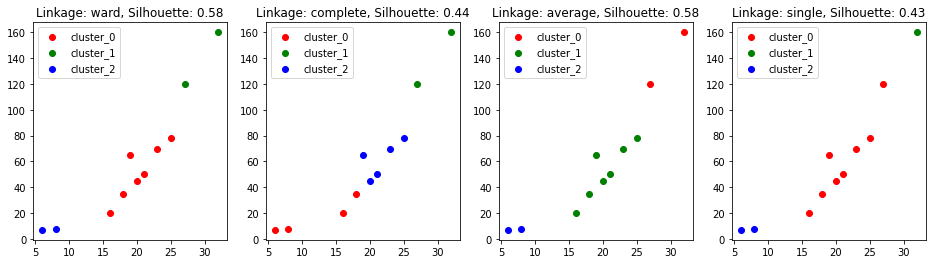

In [24]:
colors = ['red', 'green', 'blue', 'magenta', 'cyan']

fig = plt.figure(figsize=(16, 4))
fig_i = 1

for link in ['ward', 'complete', 'average', 'single']:
    clustering = AgglomerativeClustering(n_clusters=3, linkage=link)
    clustering.fit(X)
    df['label'] = clustering.labels_
    
    fig.add_subplot(1, 4, fig_i)

    plt.title(
        f'Linkage: {link}, ' + 
        f'Silhouette: {round(silhouette_score(X, df["label"]), 2)}'
    )
    
    for i in range(clustering.n_clusters_):
        cluster = df.loc[df['label'] == i]

        plt.scatter(
            cluster['height'], cluster['weight'], 
            color=colors[i], label=f'cluster_{i}'
        )
        plt.legend()
    
    fig_i += 1

plt.show()

## Algoritmi Hijerarhijskog Klasterovanja: `scipy`

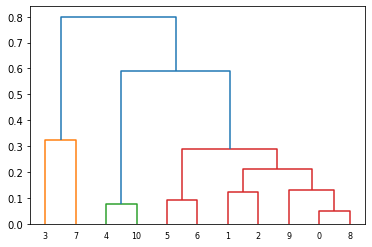

In [30]:
Z = linkage(X, 'average')
dn = dendrogram(Z, labels=X.index, leaf_font_size=8, distance_sort=True)
plt.show()

Jasno vidimo da imamo $3$ dobro odvojena klastera i da nije potrebno vrsiti poslednja dva spajanja.

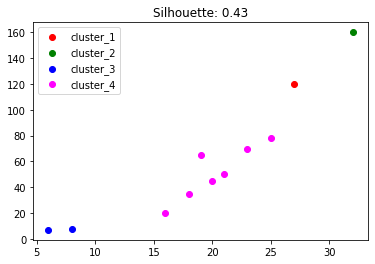

In [37]:
df['label'] = fcluster(Z, t=0.3, criterion='distance')

plt.title(f'Silhouette: {round(silhouette_score(X, df["label"]), 2)}')

for i in range(max(df['label'])):
    cluster = df.loc[df['label'] == i + 1]
    
    plt.scatter(
        cluster['height'], cluster['weight'], 
        color=colors[i], label=f'cluster_{i + 1}'
    )
    
plt.legend()
plt.show()

## Algoritam: DBSCAN

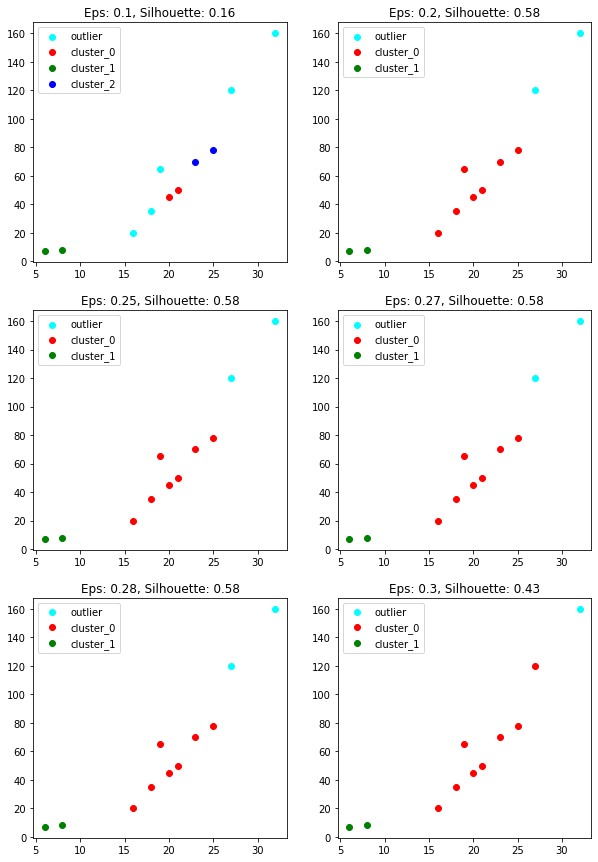

In [45]:
fig = plt.figure(figsize=(10, 15))

plt_i = 1

for eps in [0.1, 0.2, 0.25, 0.27, 0.28, 0.3]:
    clustering = DBSCAN(eps, min_samples=2)
    clustering.fit(X)
    df['label'] = clustering.labels_
    
    n_clusters = max(df['label']) + 1
    
    fig.add_subplot(3, 2, plt_i)
    plt.title(
        f'Eps: {eps}, ' +
        f'Silhouette: {round(silhouette_score(X, df["label"]), 2)}'
    )
    
    for i in range(-1, n_clusters):
        cluster = df.loc[df['label'] == i]
        
        if i == -1:
            label = 'outlier'
        else:
            label = f'cluster_{i}'
        
        plt.scatter(
            cluster['height'], cluster['weight'],
            color=colors[i], label=label
        )
        
    plt.legend()
    
    plt_i += 1
    
plt.show()
    